# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

Juan Antonio Chiñas Mata: A01794191 <br>
José Alejandro Cortés Pérez: A01795033 <br>
Moises Flores Ortíz: A01795489 <br>
Mardonio Manuel Román Ramírez: A01795265 <br>
Miriam Eunice Rosas Medellín: A01795550 <br><br><br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 5 or 6 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

In [ ]:
# Import libraries
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Download Cifar10 dataset

In [ ]:
# Check if GPU runtime is available
torch.cuda.is_available()

True

In [ ]:
# Path to the data directory
DATA_PATH = '/content/drive/My Drive/Colab Notebooks/MNA/TC5033 - Deep Learning/Semana_5'

# Dataset sizes
NUM_TRAIN = 50_000
NUM_VAL = 5_000
NUM_TEST = 5_000

# Minibatch size for DataLoader
MINIBATCH_SIZE = 64

# Transformation pipeline: Convert images to tensors and normalize with the given mean and std
transform_cifar = T.Compose([
    T.ToTensor(),
    T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
])

# Load CIFAR-10 training dataset
cifar10_train = datasets.CIFAR10(
    DATA_PATH, train=True, download=True, transform=transform_cifar
)
train_loader = DataLoader(
    cifar10_train, batch_size=MINIBATCH_SIZE,
    sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN))
)

# Load CIFAR-10 validation dataset (using the test split for validation)
cifar10_val = datasets.CIFAR10(
    DATA_PATH, train=False, download=True, transform=transform_cifar
)
val_loader = DataLoader(
    cifar10_val, batch_size=MINIBATCH_SIZE,
    sampler=sampler.SubsetRandomSampler(range(NUM_VAL))
)

# Load CIFAR-10 test dataset (subset for testing after the validation set)
cifar10_test = datasets.CIFAR10(
    DATA_PATH, train=False, download=True, transform=transform_cifar
)
test_loader = DataLoader(
    cifar10_test, batch_size=MINIBATCH_SIZE,
    sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test)))
)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# See details of the dataset transformation
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/drive/My Drive/Colab Notebooks/MNA/TC5033 - Deep Learning/Semana_5
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [ ]:
# See the batch size attribute
print(f'The train set batch size is {train_loader.batch_size}')

The train set batch size is 64


In [ ]:
# Iterate through the training data batches
for i, (x, y) in enumerate(train_loader):
    # Print the batch index and the shapes of input data (x) and labels (y)
    print(f'The batch number {i} has an x with shape {x.shape} and y with shape {y.shape}')

    # After processing the first 5 batches, print a separator and break the loop
    if i == 5:
        print('...')
        break

The batch number 0 has an x with shape torch.Size([64, 3, 32, 32]) and y with shape torch.Size([64])
The batch number 1 has an x with shape torch.Size([64, 3, 32, 32]) and y with shape torch.Size([64])
The batch number 2 has an x with shape torch.Size([64, 3, 32, 32]) and y with shape torch.Size([64])
The batch number 3 has an x with shape torch.Size([64, 3, 32, 32]) and y with shape torch.Size([64])
The batch number 4 has an x with shape torch.Size([64, 3, 32, 32]) and y with shape torch.Size([64])
The batch number 5 has an x with shape torch.Size([64, 3, 32, 32]) and y with shape torch.Size([64])
...


### Using  GPUs

In [ ]:
# Check if user is connected to GPU runtime
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Print the device being used
print(f'The device being used is {device}')

The device being used is cuda


### Show images

This code randomly selects an image from the test dataset and visualizes it, ensuring that the image is properly displayed by normalizing its pixel values and removing axis labels. It is intended to show that the dataset is composed of different image classes from which we are going to create two different neural network models with the objective of classifying them.

The sampled image represents a: frog


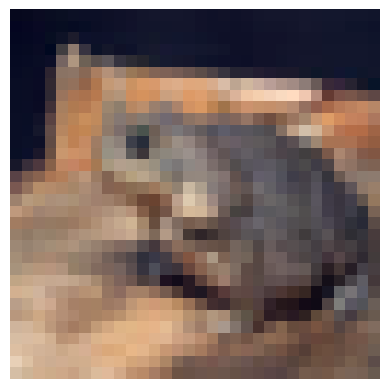

In [ ]:
# Get the list of class labels from the test dataset
classes = test_loader.dataset.classes

# Function to plot an image without axis labels
def plot_figure(image):
    """
    Plots a single image by adjusting its channel order for proper display.

    Args:
        image (Tensor or numpy array): A 3D tensor or numpy array representing
        an image with the shape (C, H, W), where C is the number of channels,
        H is the height, and W is the width. The channels are assumed to be
        in the format expected by Matplotlib (i.e., RGB channels).

    Returns:
        None
    """
    # Plot the image, adjusting the channel order for display
    plt.imshow(np.transpose(image, (1, 2, 0)))
    plt.axis('off')  # Remove the axis
    plt.show()  # Display the image

# Randomly sample an index from the test dataset
rnd_sample_idx = np.random.randint(len(test_loader))

# Print the class of the sampled image
print(f'The sampled image represents a: {classes[test_loader.dataset[rnd_sample_idx][1]]}')

# Get the image corresponding to the random index
image = test_loader.dataset[rnd_sample_idx][0]

# Normalize the image to have values between 0 and 1 for display
image = (image - image.min()) / (image.max() - image.min())

# Plot the normalized image
plot_figure(image)

Below we are showing random images of the 10 different classes of the dataset.

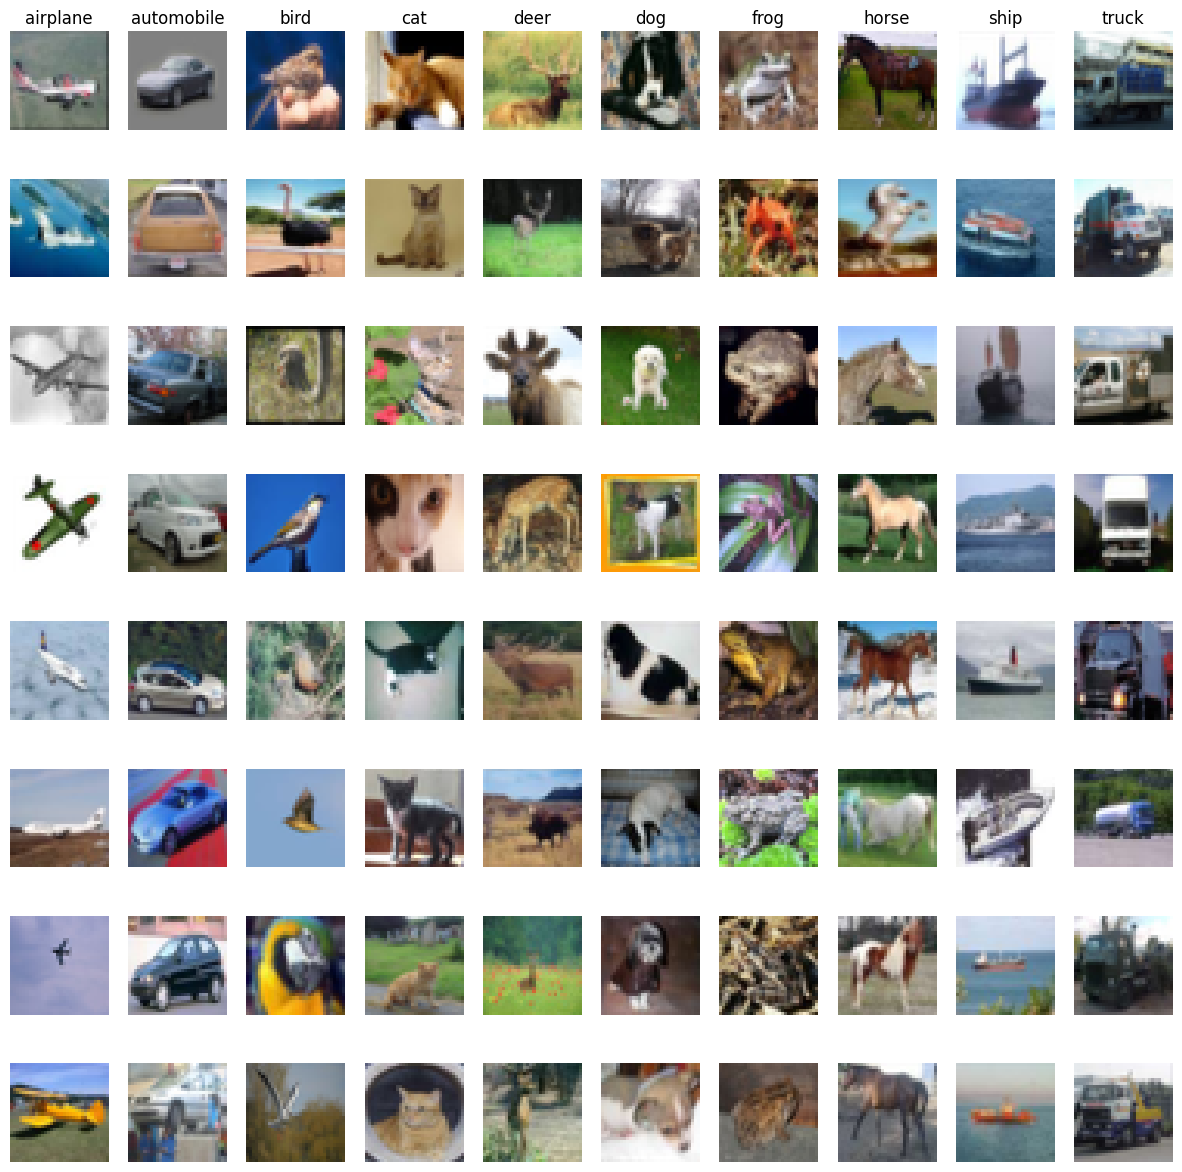

In [ ]:
def plot_cifar10_grid():
    """
    Plots a grid of sample images from the CIFAR-10 test dataset, organized by class.

    This function:
    1. Retrieves the class labels from the CIFAR-10 test dataset.
    2. Samples a fixed number of images (8) from each class in the dataset.
    3. Displays these images in a grid layout, with each class represented in a column.
    4. Sets the title of each column to the corresponding class label.

    The function assumes that the `test_loader` is a PyTorch DataLoader object
    that provides the CIFAR-10 test dataset. The images are displayed without axes
    and the first image of each class is labeled with its class name.

    Args:
        None

    Returns:
        None
    """
    # Get the list of class labels from the test dataset
    classes = test_loader.dataset.classes
    # Set the total number of samples to display per class
    total_samples = 8

    # Create a figure for the grid of images
    plt.figure(figsize=(15, 15))

    # Loop through each class and sample a few images
    for label, sample in enumerate(classes):
        # Find the indices of images belonging to the current class
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))

        # Randomly select samples from the current class without replacement
        sample_idxs = np.random.choice(class_idxs, total_samples, replace=False)

        # Loop through the selected indices and plot the corresponding images
        for i, idx in enumerate(sample_idxs):
            # Calculate the position of the subplot in the grid
            plt_idx = i * len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)

            # Display the image for the current sample
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')  # Hide the axis

            # Set the title for the first image in each class
            if i == 0:
                plt.title(sample)

    # Display the grid of images
    plt.show()

# Call the function to plot the CIFAR-10 grid
plot_cifar10_grid()

### Calculate accuracy


The accuracy function is designed to compute the classification accuracy of a deep learning model on a given dataset, which is provided through a data loader. Accuracy, in this context, is the proportion of correct predictions made by the model compared to the total number of samples. This function is essential for evaluating the performance of a model during both training and validation phases.

In [ ]:
def accuracy(model, loader):
    """
    Computes the accuracy of the given model on the provided data loader.

    Args:
        model (torch.nn.Module): The model to be evaluated.
        loader (torch.utils.data.DataLoader): The data loader that provides the input samples and labels.

    Returns:
        float: The accuracy of the model on the given dataset, expressed as a value between 0 and 1.

    The function performs the following steps:
    1. Sets the model to evaluation mode and moves it to the specified device (e.g., GPU or CPU).
    2. Iterates over the data loader, which provides batches of input samples and corresponding labels.
    3. For each batch, it performs the following:
        - Moves the inputs and labels to the appropriate device.
        - Performs a forward pass through the model to get prediction scores.
        - Determines the predicted class by selecting the class with the highest score.
        - Compares the predictions with the true labels and counts the number of correct predictions.
    4. Computes the accuracy as the ratio of correct predictions to the total number of samples.
    """
    # Initialize counters for the number of correct predictions and total samples
    num_correct = 0
    num_total = 0

    # Set the model to evaluation mode and move it to the specified device
    model.eval()
    model = model.to(device=device)

    # Disable gradient computation for inference
    with torch.no_grad():
        # Iterate through the data loader
        for xi, yi in loader:
            # Move inputs and labels to the specified device and set data types
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)

            # Get the model's output scores
            scores = model(xi)

            # Get the predicted class by selecting the class with the highest score
            _, pred = scores.max(dim=1)

            # Update the number of correct predictions
            num_correct += (pred == yi).sum()

            # Update the total number of samples processed
            num_total += pred.size(0)

    # Return the accuracy as a float value
    return float(num_correct) / num_total

### Training loop

### `train` function parameters

- **`model (torch.nn.Module)`**: Defines the architecture of the neural network to be trained. The model contains the layers and the forward pass logic that will learn from the data.
  
- **`optimiser (torch.optim.Optimizer)`**: Responsible for updating the model's parameters using the computed gradients. It determines how the weights are adjusted to minimize the loss.
  
- **`scheduler (torch.optim.lr_scheduler)`**: Adjusts the learning rate during training to help the model converge more efficiently. It reduces the learning rate at certain intervals or conditions to improve performance.
  
- **`epochs (int, optional)`**: Specifies how many times the entire dataset will be passed through the model. More epochs allow the model to learn more, but excessive epochs can lead to overfitting.

In [ ]:
def train(model, optimiser, scheduler, epochs=100):
    """
    Trains a model using a specified optimizer and scheduler for a given number of epochs.

    Args:
        model (torch.nn.Module): The model to be trained.
        optimiser (torch.optim.Optimizer): The optimizer used to update the model's parameters.
        scheduler (torch.optim.lr_scheduler): The learning rate scheduler used to adjust the learning rate.
        epochs (int, optional): The number of epochs to train the model. Defaults to 100.

    Returns:
        None

    The function trains the model in the following steps:
    1. Moves the model to the specified device (GPU or CPU).
    2. Iterates over the specified number of epochs.
    3. For each epoch, it performs the following:
        - Iterates over the training data loader.
        - Sets the model to training mode.
        - Moves input data and labels to the specified device.
        - Performs a forward pass to compute predictions.
        - Computes the cross-entropy loss between predictions and ground truth.
        - Performs a backward pass to compute gradients.
        - Updates the model parameters using the optimizer.
        - Evaluates the model on the validation set after every epoch.
        - Prints the current epoch, loss, and accuracy.
        - Updates the learning rate based on the scheduler.
    """
    # Move the model to the specified device
    model = model.to(device=device)

    # Iterate over the specified number of epochs
    for epoch in range(epochs):
        # Iterate through the training data loader
        for i, (xi, yi) in enumerate(train_loader):
            # Set the model to training mode
            model.train()

            # Move inputs and labels to the specified device and set data types
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)

            # Forward pass: Get model's predictions
            scores = model(xi)

            # Compute the cross-entropy loss
            cost = F.cross_entropy(input=scores, target=yi)

            # Zero the gradients of the optimiser
            optimiser.zero_grad()

            # Backward pass: Compute gradients
            cost.backward()

            # Update the model's parameters
            optimiser.step()

        # Evaluate the model on the validation set after each epoch
        acc = accuracy(model, val_loader)

        # Print the current epoch, loss, and accuracy
        print(f'Epoch: {epoch}, Loss: {cost.item()}, Accuracy: {acc}')

        # Update the learning rate using the scheduler
        scheduler.step()

### Linear model

### Baseline Linear Model Justification

Before building a more complex convolutional neural network, we first implement a simpler baseline model using fully connected (linear) layers. This model serves as a point of comparison to understand the performance gains of more complex architectures on the CIFAR-10 dataset.

#### 1. *Model Architecture*:
   The baseline model, *model1*, is a simple feedforward neural network with two hidden layers. The architecture is as follows:
   - The input image (32x32x3) is flattened into a vector of size *3072*.
   - Two fully connected layers (hidden layers) are used, each with *256 units*.
   - The output layer is a *10-unit* layer, corresponding to the 10 classes in the CIFAR-10 dataset.

#### 2. *Hidden Layers*:
   - The hidden layers consist of *256 units each*. This size was chosen to provide the model with enough capacity to learn useful features without introducing too many parameters that might lead to overfitting.
   - Each hidden layer is followed by a *ReLU activation* function to introduce non-linearity, enabling the model to capture more complex patterns in the data.

#### 3. *Output Layer*:
   - The final layer is a *linear output layer* with 10 units, one for each class in CIFAR-10. The output of this layer will be passed through a softmax function (implicitly used in loss calculation) to produce class probabilities.

#### 4. *Training Configuration*:
   - The *Adam optimizer* is used with a learning rate of 0.001. Adam is chosen because of its ability to adapt the learning rate for each parameter, which generally results in faster convergence compared to vanilla gradient descent.
   - A *StepLR scheduler* is applied, which reduces the learning rate by a factor of 0.1 after every 5 epochs. This allows the model to make larger updates during the initial training phases and finer updates as it gets closer to a minimum.
   - The model is trained for *10 epochs*, which is sufficient for this simpler architecture to converge on a baseline performance.

#### 5. *Advantages of Simplicity*:
   - This linear model provides a *baseline performance* for comparison with more sophisticated models like CNNs. Its simplicity allows for fast training and serves as a good starting point for experimentation.
   - Since there are no convolutional layers, this model doesn't capture spatial hierarchies (such as edges, textures, and shapes) present in images. Instead, it treats each pixel as an independent feature. As such, it is expected that this model will perform significantly worse on image classification tasks like CIFAR-10, which depend heavily on spatial relationships between pixels.

#### 6. *Suitability for CIFAR-10*:
   - CIFAR-10 consists of small, low-resolution images (32x32 pixels). In such a case, a fully connected network might have difficulty identifying meaningful patterns, especially without any feature extraction layers (like convolutions). Therefore, while this model is a useful benchmark, it is not well-suited for this dataset. The architecture lacks the ability to process local patterns and spatial dependencies critical for image data.
   - This baseline model, however, provides a useful lower bound for performance. Once trained, it allows us to quantify how much better the CNN architecture performs, demonstrating the importance of spatial feature extraction.

#### 7. *Summary*:
   This model, though simple and fast to train, is limited in its capacity to learn complex patterns from image data. It treats all pixels independently, which is suboptimal for image classification tasks like CIFAR-10. Nonetheless, it serves as an essential baseline to understand the impact of more sophisticated architectures (like CNNs) on performance.

In [ ]:
# Define hyperparameters
hidden1 = 256  # Number of units in the first hidden layer
hidden2 = 256  # Number of units in the second hidden layer
lr = 0.001  # Learning rate
epochs = 10  # Number of training epochs

# Define the neural network model using nn.Sequential
model1 = nn.Sequential(
    nn.Flatten(),  # Flatten the input image into a vector
    nn.Linear(in_features=32 * 32 * 3, out_features=hidden1), nn.ReLU(),  # First hidden layer with ReLU activation
    nn.Linear(in_features=hidden1, out_features=hidden2), nn.ReLU(),  # Second hidden layer with ReLU activation
    nn.Linear(in_features=hidden2, out_features=10)  # Output layer for 10 classes
)

# Initialize the optimizer with the Adam optimizer and set the learning rate
optimiser = torch.optim.Adam(model1.parameters(), lr=lr)

# Define the learning rate scheduler to reduce the learning rate when the model stops improving
scheduler = torch.optim.lr_scheduler.StepLR(optimiser, step_size=5, gamma=0.1)

In [ ]:
# Train the model using the specified optimizer, scheduler, and number of epochs
train(model1, optimiser, scheduler, epochs)

Epoch: 0, costo: 1.2674976587295532, accuracy: 0.484375
Epoch: 1, costo: 1.0902379751205444, accuracy: 0.4375
Epoch: 2, costo: 1.2271881103515625, accuracy: 0.421875
Epoch: 3, costo: 1.4053213596343994, accuracy: 0.46875
Epoch: 4, costo: 0.867491602897644, accuracy: 0.578125


### Sequential CNN

### CNN Architecture Justification
The architecture of the CNN model, *modelCNN1*, has been specifically designed and optimized for the CIFAR-10 dataset, which consists of 60,000 images across 10 classes (with 50,000 training and 10,000 test images). Each image is of size 32x32 with 3 color channels (RGB). Given this input, the architecture balances model complexity, generalization, and computational efficiency. Below is a breakdown of the architectural decisions:

#### 1. *Convolutional Layers (Conv2D)*:
   - The model consists of 4 convolutional layers with increasing channels: 32, 64, 128, and 256. This progressive increase allows the model to first capture lower-level features (such as edges and textures) and later move on to more abstract features (like object parts and shapes).
   - *Kernel size (3x3)* is standard for capturing local spatial features while retaining computational efficiency.
   - *Padding of 1* ensures the input image dimensions are preserved, which simplifies later operations (especially when flattened before the fully connected layers).

#### 2. *ReLU Activation*:
   - Each convolutional layer is followed by a *ReLU activation* function. ReLU introduces non-linearity into the model, enabling it to learn complex patterns. It also helps mitigate the vanishing gradient problem during backpropagation.

#### 3. *Max Pooling Layers*:
   - Max Pooling with a *2x2 filter* is applied after the second and fourth convolutional layers. This reduces the spatial dimensions by half, effectively lowering the computational cost and controlling overfitting. It also helps to aggregate features and adds translational invariance.

#### 4. *Dropout Layers*:
   - Dropout with a probability of *0.4* is used after each Max Pooling and fully connected layer to prevent overfitting. Dropout randomly disables some neurons during training, which forces the model to learn more robust features and prevents co-adaptation of neurons.

#### 5. *Fully Connected Layers (Linear)*:
   - After flattening the output of the convolutional layers, the model includes a *fully connected layer with 512 units*. This helps the model map the high-level features extracted by the convolutional layers to the output classes.
   - The final output layer has *10 units*, corresponding to the 10 classes in the CIFAR-10 dataset.

#### 6. *Training Configuration*:
   - The model is trained with the *Adam optimizer* (learning rate = 0.001), which is a robust optimizer well-suited for handling noisy gradients and sparse data.
   - A *StepLR scheduler* decreases the learning rate by a factor of 0.1 every 3 epochs, allowing the model to focus on fine-tuning once it gets closer to a good solution.
   - The *batch size* and number of *epochs (30)* were chosen to balance training efficiency and the model’s ability to converge.

#### 7. *CIFAR-10 Dataset Suitability*:
   - Given the relatively small image size of 32x32, the architecture is designed to preserve spatial resolution in the early layers and progressively reduce it as the feature complexity increases. The use of dropout and Max Pooling ensures that the model generalizes well without overfitting to the training data, a common issue in smaller datasets like CIFAR-10.
   - The chosen model depth (4 convolutional layers) is well-suited for a dataset of this size and complexity, as it allows the network to learn multi-level features without over-complicating the model, which could lead to overfitting.

In summary, *modelCNN1* balances the need for computational efficiency with robust learning. It captures the spatial hierarchies inherent in the CIFAR-10 dataset while mitigating overfitting through dropout and pooling strategies.

In [ ]:
# Define hyperparameters
channel1 = 32  # Number of output channels for the first convolutional layer
channel2 = 64  # Number of output channels for the second convolutional layer
channel3 = 128  # Number of output channels for the third convolutional layer
channel4 = 256  # Number of output channels for the fourth convolutional layer
dropout_prob = 0.3  # Dropout probability for regularization
epochs = 30  # Number of training epochs
lr = 0.001  # Learning rate

# Define the CNN model using nn.Sequential
modelCNN1 = nn.Sequential(
    # First convolutional layer
    nn.Conv2d(in_channels=3, out_channels=channel1, kernel_size=3, padding=1),
    nn.ReLU(),

    # Second convolutional layer
    nn.Conv2d(in_channels=channel1, out_channels=channel2, kernel_size=3, padding=1),
    nn.ReLU(),
    # MaxPooling to reduce spatial size
    nn.MaxPool2d(2, 2),
    nn.Dropout(p=dropout_prob),  # Apply dropout for regularization

    # Third convolutional layer
    nn.Conv2d(in_channels=channel2, out_channels=channel3, kernel_size=3, padding=1),
    nn.ReLU(),

    # Fourth convolutional layer
    nn.Conv2d(in_channels=channel3, out_channels=channel4, kernel_size=3, padding=1),
    nn.ReLU(),
    # Apply MaxPooling to reduce spatial size again
    nn.MaxPool2d(2, 2),
    nn.Dropout(p=dropout_prob),  # Apply dropout after MaxPooling

    # Flatten the output for the fully connected layers
    nn.Flatten(),

    # Fully connected layer
    nn.Linear(in_features=8 * 8 * channel4, out_features=512),
    nn.ReLU(),
    nn.Dropout(p=dropout_prob),

    # Output layer (10 classes for CIFAR-10)
    nn.Linear(in_features=512, out_features=10)
)

# Initialize the Adam optimizer with model parameters
optimiser = torch.optim.Adam(modelCNN1.parameters(), lr=lr)

# Learning rate scheduler to decrease the learning rate when the model stops improving
scheduler = torch.optim.lr_scheduler.StepLR(optimiser, step_size=5, gamma=0.1)

In [ ]:
# Train the model using the specified optimizer, scheduler, and number of epochs
train(modelCNN1, optimiser, scheduler, epochs)

Epoch: 0, costo: 0.724955677986145, accuracy: 0.703125
Epoch: 1, costo: 1.3126171827316284, accuracy: 0.703125
Epoch: 2, costo: 0.6189399361610413, accuracy: 0.78125
Epoch: 3, costo: 0.583449125289917, accuracy: 0.765625
Epoch: 4, costo: 0.5916690230369568, accuracy: 0.875


###Testing over val and test sets:

The below code attempts to show the accuracy of the validation and test sets of each of the two models that were defined previously comparing the predicted output versus the real images.

In [ ]:
def visualize_predictions(model, data_loader, num_images=10):
    """
    Visualizes model predictions on a dataset.

    Args:
        model: Trained model.
        data_loader: DataLoader providing images and labels.
        num_images: Number of images to display.

    Returns:
        None
    """
    # Set the model to evaluation mode
    model.eval()
    model.to(device)

    images, labels, predicted = [], [], []
    classes = data_loader.dataset.classes  # Get the class names from the dataset

    # Iterate through the data loader without tracking gradients
    with torch.no_grad():
        for data in data_loader:
            inputs, label_batch = data

            # Move data to the device (GPU or CPU)
            inputs, label_batch = inputs.to(device), label_batch.to(device)

            # Perform forward pass and get predictions
            outputs = model(inputs)
            _, preds_batch = torch.max(outputs, 1)

            # Append the images and labels to the lists for visualization
            images.append(inputs.cpu())  # Move to CPU for visualization
            labels.append(label_batch.cpu())  # Move to CPU for visualization
            predicted.append(preds_batch.cpu())  # Move to CPU for visualization

            # Break the loop if we have collected enough images
            if len(images) * inputs.size(0) >= num_images:
                break

    # Concatenate the lists into tensors and slice to get the desired number of images
    images = torch.cat(images)[:num_images]
    labels = torch.cat(labels)[:num_images]
    predicted = torch.cat(predicted)[:num_images]

    # Function to display an image
    def imshow(img):
        """
        Displays an image, unnormalizes it, and ensures pixel values are within the valid range for visualization.

        Args:
            img (Tensor): A 3D tensor representing an image in (C, H, W) format,
            where C is the number of channels (usually 3 for RGB images),
            H is the height, and W is the width.

        Returns:
            None
        """
        img = img / 2 + 0.5  # Unnormalize the image
        np_img = img.numpy()
        np_img = np.clip(np_img, 0, 1)  # Ensure the pixel values are within the valid range
        plt.imshow(np.transpose(np_img, (1, 2, 0)))
        plt.axis('off')

    # Plot the images and predictions
    plt.figure(figsize=(15, 8))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        imshow(images[i])
        plt.title(f'Pred: {classes[predicted[i].item()]}, Real: {classes[labels[i].item()]}')

    plt.tight_layout()
    plt.show()

In [ ]:
# Show the accuracy of the CNN model validation set
print(f'The accuracy of the CNN model validation set is {accuracy(modelCNN1, val_loader)}')

The accuracy of the CNN model validation set is 0.78125


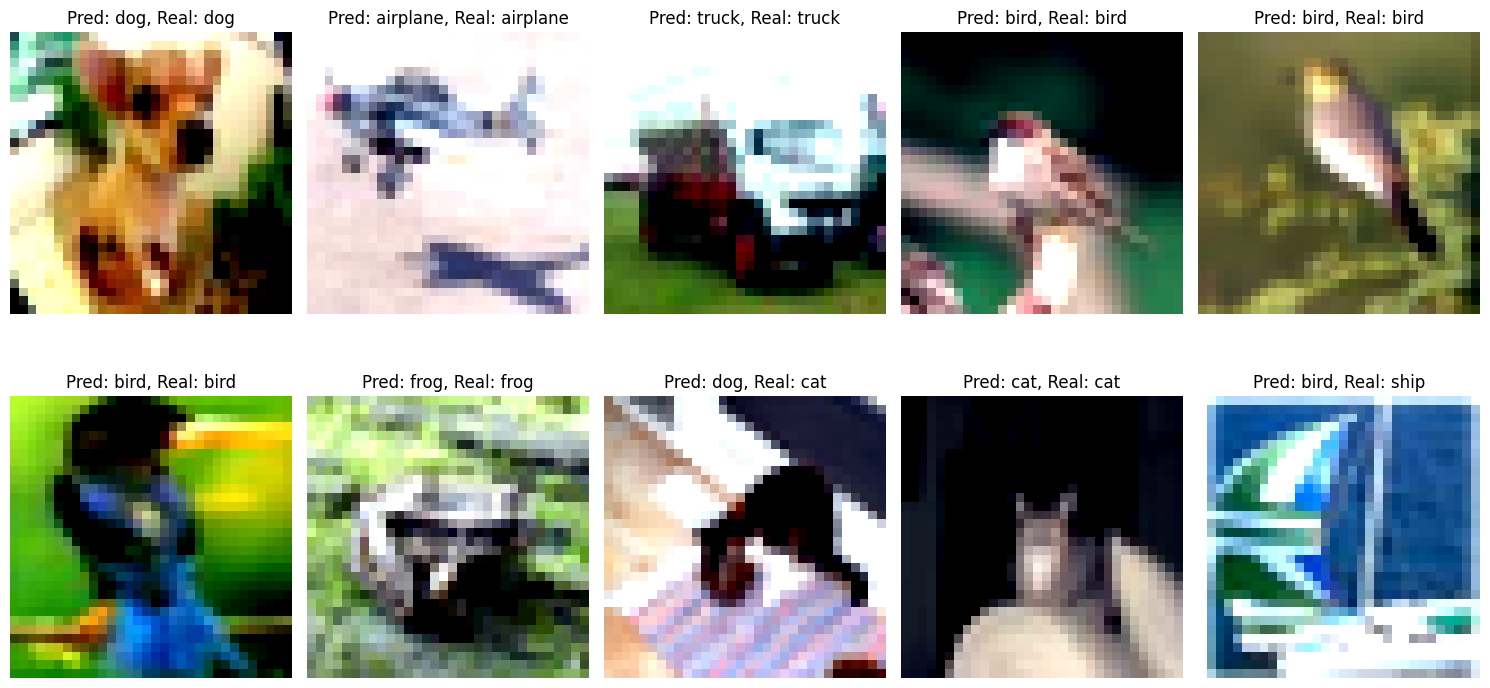

In [ ]:
# Plot the accuracy of the CNN model validation set
visualize_predictions(modelCNN1, val_loader, num_images=10)

In [ ]:
# Show the accuracy of the baseline model validation set
print(f'The accuracy of the baseline model validation set is {accuracy(model1, val_loader)}')

The accuracy of the baseline model validation set is 0.546875


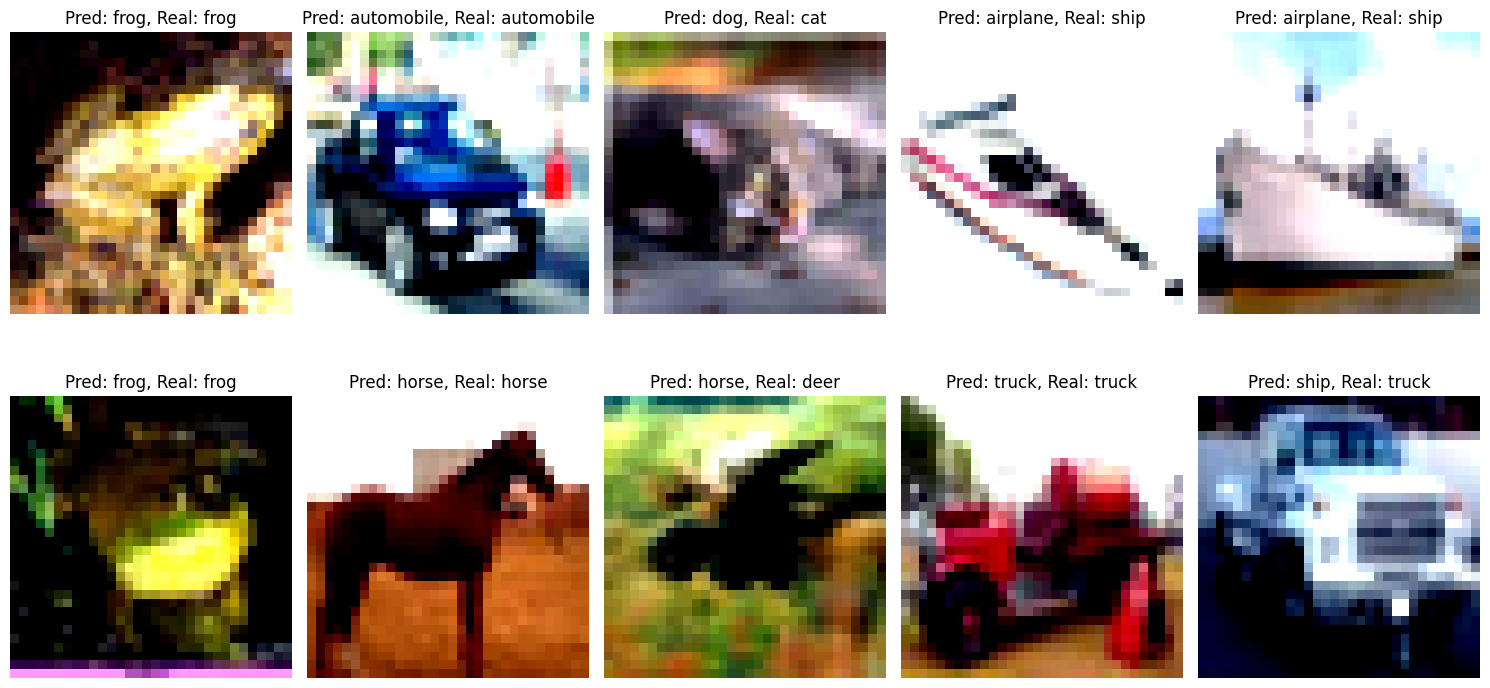

In [ ]:
# Plot the accuracy of the baseline model validation set
visualize_predictions(model1, val_loader, num_images=10)

In [ ]:
# Show the accuracy of the CNN model test set
print(f'The accuracy of the CNN model test set is {accuracy(modelCNN1, test_loader)}')

The accuracy of the CNN model test set is 0.796875


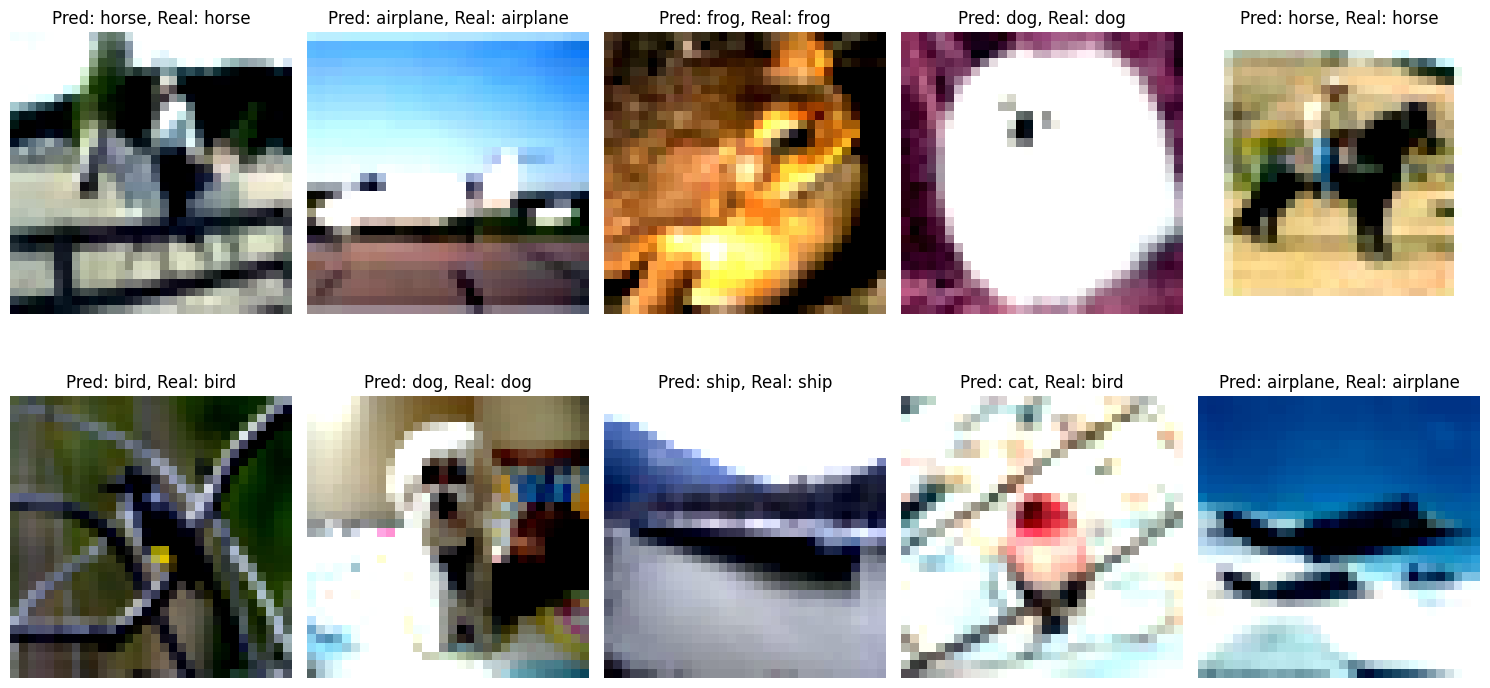

In [ ]:
# Plot the accuracy of the CNN model test set
visualize_predictions(modelCNN1, test_loader, num_images=10)

In [ ]:
# Show the accuracy of the baseline model test set
print(f'The accuracy of the baseline model test set is {accuracy(model1, test_loader)}')

The accuracy of the baseline model test set is 0.546875


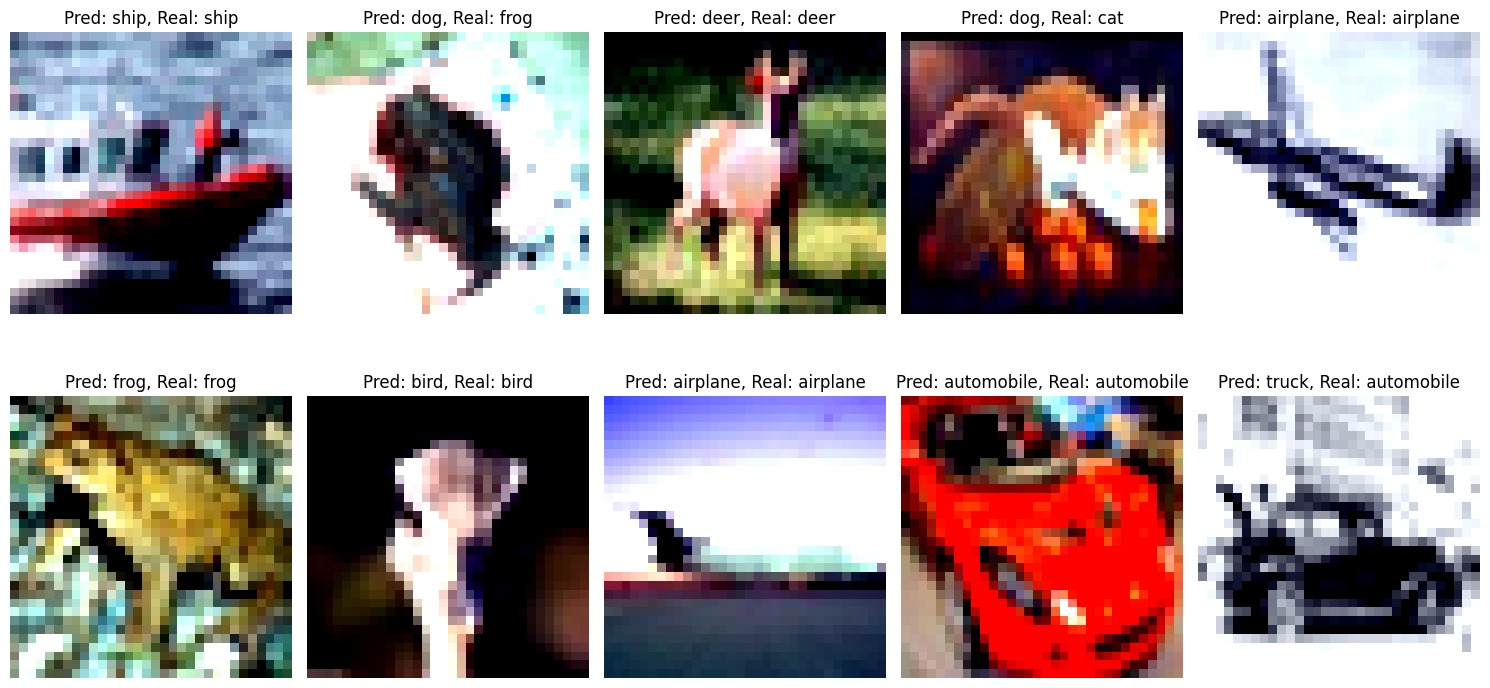

In [ ]:
# Plot the accuracy of the baseline model test set
visualize_predictions(model1, test_loader, num_images=10)

## Conclusion
In this notebook, we explored the CIFAR-10 dataset and built two models to classify images: a baseline linear model and a convolutional neural network (CNN). We compared their performance and discussed the architectural decisions behind the CNN. The CNN significantly outperformed the baseline model, demonstrating the importance of spatial feature extraction for image classification tasks. By using convolutional layers, max pooling, and dropout, the CNN achieved an accuracy of ~80% on the validation set and test set, showcasing its ability to learn complex patterns and generalize well. This notebook provides a foundational understanding of CNNs and their effectiveness in computer vision applications.